In [1]:
import numpy as np
import xarray as xr
from matplotlib.pyplot import plot

In [2]:
path = "/global/scratch/users/adac/Slope_Flow/SlopeFlow_icc/WRFV3/test/em_les/"
ds = xr.open_dataset(path+'wrfinput_d01')
ds

<xarray.Dataset>
Dimensions:               (Time: 1, south_north: 149, west_east: 399,
                           bottom_top: 68, bottom_top_stag: 69,
                           soil_layers_stag: 5, west_east_stag: 400,
                           south_north_stag: 150, land_cat_stag: 21,
                           soil_cat_stag: 16, num_ext_model_couple_dom_stag: 1)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 ...
    XLONG                 (Time, south_north, west_east) float32 ...
    XLAT_U                (Time, south_north, west_east_stag) float32 ...
    XLONG_U               (Time, south_north, west_east_stag) float32 ...
    XLAT_V                (Time, south_north_stag, west_east) float32 ...
    XLONG_V               (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag,
                                land_cat_stag, soil_cat_stag,
                                num_ext_model_couple_dom_stag
Data variables: (12/165)
    Times                 (Time) |S19 ...
    LU_INDEX              (Time, south_north, west_east) float32 ...
    ZNU                   (Time, bottom_top) float32 ...
    ZNW                   (Time, bottom_top_stag) float32 ...
    ZS                    (Time, soil_layers_stag) float32 ...
    DZS                   (Time, soil_layers_stag) float32 ...
    ...                    ...
    C4F                   (Time, bottom_top_stag) float32 ...
    PCB                   (Time, south_north, west_east) float32 ...
    PC                    (Time, south_north, west_east) float32 ...
    LANDMASK              (Time, south_north, west_east) float32 ...
    LAKEMASK              (Time, south_north, west_east) float32 ...
    SST                   (Time, south_north, west_east) float32 ...
Attributes: (12/79)
    TITLE:                            OUTPUT FROM IDEAL V3.9.1.1 PREPROCESSOR
    START_DATE:                      2014-03-21_12:00:00
    SIMULATION_START_DATE:           2014-03-21_12:00:00
    WEST-EAST_GRID_DIMENSION:        400
    SOUTH-NORTH_GRID_DIMENSION:      150
    BOTTOM-TOP_GRID_DIMENSION:       69
    ...                              ...
    ISLAKE:                          0
    ISICE:                           0
    ISURBAN:                         0
    ISOILWATER:                      0
    HYBRID_OPT:                      -1
    ETAC:                            0.0

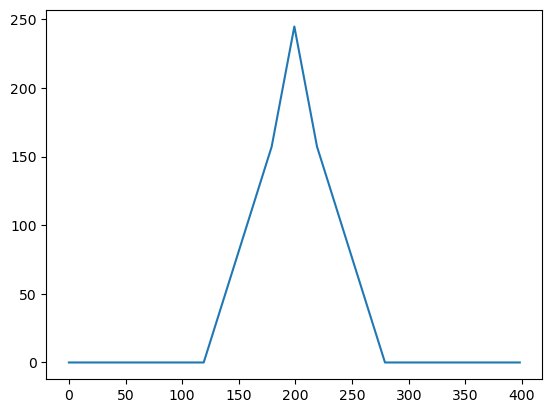

In [3]:
plot(ds['HGT'].values[0,75,:])

In [4]:
elev = (ds['PHB'] + ds['PH'])/9.81
np.mean(np.diff(elev.values[0,:2,:,:],axis=0))

3.3110414

In [5]:
ds['ZNW'].values

array([[1.        , 0.99953455, 0.9990692 , 0.9985575 , 0.9979949 ,
        0.9973763 , 0.9966962 , 0.9959484 , 0.99512637, 0.99422264,
        0.99322927, 0.9921374 , 0.99093735, 0.98961854, 0.9881693 ,
        0.986577  , 0.9848276 , 0.98290586, 0.98079515, 0.9784772 ,
        0.975932  , 0.9731379 , 0.9700712 , 0.9667059 , 0.9630139 ,
        0.9589645 , 0.9545245 , 0.94965774, 0.9443251 , 0.9384842 ,
        0.9320893 , 0.9250913 , 0.91743726, 0.9090703 , 0.8999298 ,
        0.8899512 , 0.8790659 , 0.8672012 , 0.8542811 , 0.84022576,
        0.8249524 , 0.8083757 , 0.7904086 , 0.77096325, 0.7499521 ,
        0.7272895 , 0.7028938 , 0.6766891 , 0.648608  , 0.61859494,
        0.58660895, 0.55262804, 0.51665324, 0.47871304, 0.4388682 ,
        0.39721638, 0.35517186, 0.3154556 , 0.2779387 , 0.24249932,
        0.20902245, 0.17739941, 0.14752753, 0.11930985, 0.09265476,
        0.06747573, 0.04369102, 0.02122343, 0.        ]], dtype=float32)

In [6]:
Pcent = ds['PB'].mean(dim=["Time", "south_north", "west_east"]).values
P0 = ds['PSFC'].mean(dim=["Time", "south_north", "west_east"]).values
print('Surface Pressure is '+str(P0))

Surface Pressure is 99507.39


In [7]:
P = np.hstack( (P0, 0.5*(Pcent[1:] + Pcent[:-1]), ds['P_TOP'].values) ) 

In [8]:
eta = (P-P[-1])/(P[0]-P[-1])
eta

array([1.        , 0.99971116, 0.99923414, 0.99872124, 0.99815726,
       0.99753714, 0.9968553 , 0.99610585, 0.99528176, 0.9943758 ,
       0.9933802 , 0.99228555, 0.99108267, 0.98976094, 0.98830825,
       0.98671216, 0.98495847, 0.9830323 , 0.9809166 , 0.97859323,
       0.9760422 , 0.97324175, 0.970168  , 0.9667951 , 0.96309465,
       0.9590362 , 0.95458657, 0.94970894, 0.9443648 , 0.9385113 ,
       0.93210316, 0.9250906 , 0.917421  , 0.90903753, 0.89987916,
       0.8898817 , 0.8789764 , 0.86709046, 0.8541482 , 0.8400697 ,
       0.82477224, 0.8081709 , 0.79017854, 0.7707078 , 0.7496716 ,
       0.72698456, 0.70256567, 0.6763395 , 0.6482396 , 0.618211  ,
       0.58621377, 0.55222714, 0.516253  , 0.47832125, 0.43849397,
       0.3971884 , 0.35581684, 0.31606132, 0.2785073 , 0.24303283,
       0.20952286, 0.17786862, 0.1479672 , 0.11972165, 0.09304024,
       0.06783628, 0.04402804, 0.02153827, 0.        ], dtype=float32)

In [9]:
ds['IVGTYP'].values

array([[[10, 10, 10, ..., 10, 10, 10],
        [10, 10, 10, ..., 10, 10, 10],
        [10, 10, 10, ..., 10, 10, 10],
        ...,
        [10, 10, 10, ..., 10, 10, 10],
        [10, 10, 10, ..., 10, 10, 10],
        [10, 10, 10, ..., 10, 10, 10]]], dtype=int32)

In [10]:
ds['ISLTYP'].values

array([[[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]]], dtype=int32)

In [11]:
ds['SMOIS'].values

array([[[[0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         ...,
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868]],

        [[0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         ...,
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868]],

        [[0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
         [0.0868, 0.0868, 0.0868, ..., 0.0868, 0.0868, 0.0868],
        